Early stopping at epoch 195


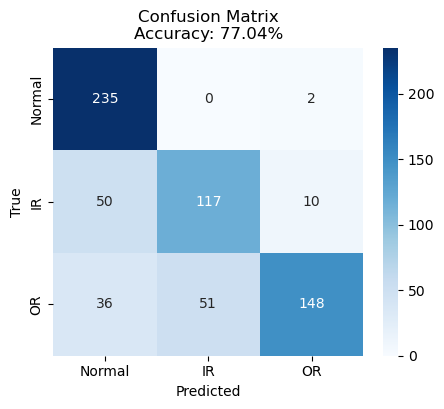

 - Model accuracy: 77.04%


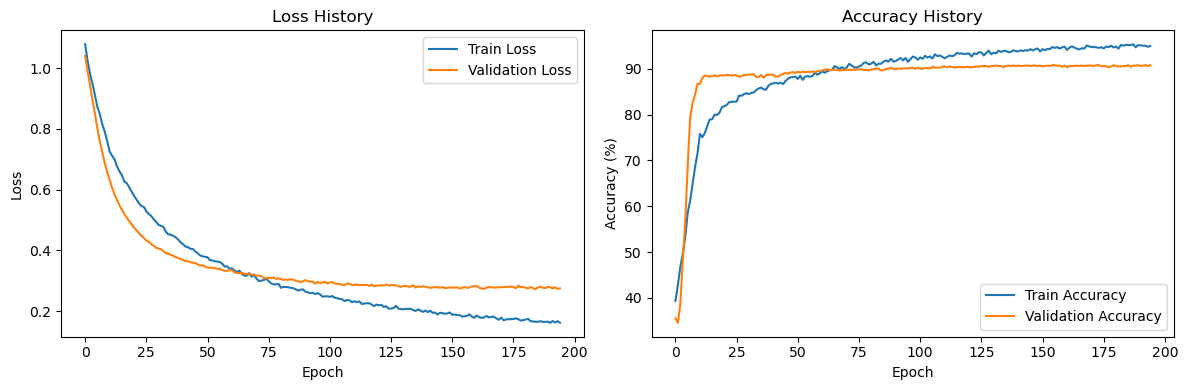

Early stopping at epoch 283


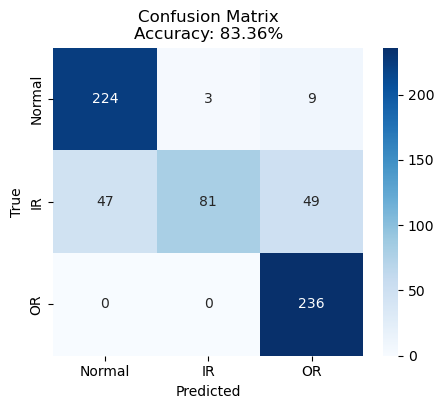

 - Model accuracy: 83.36%


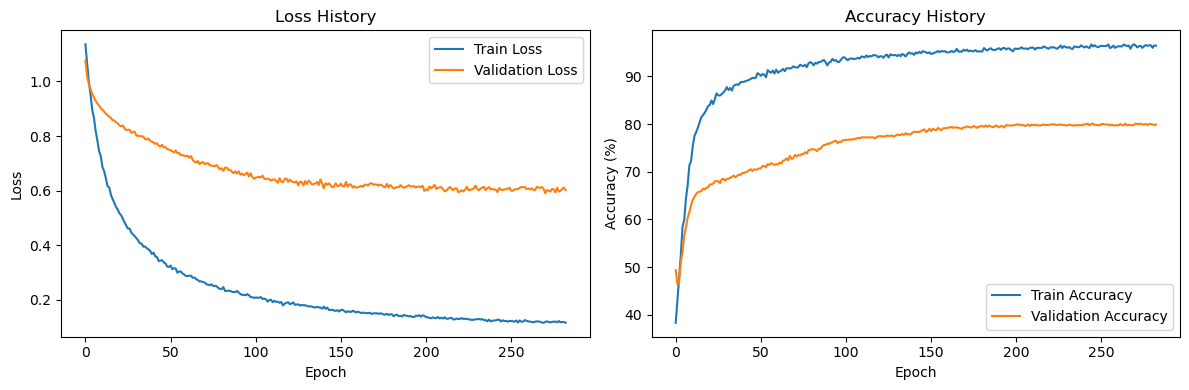

Early stopping at epoch 193


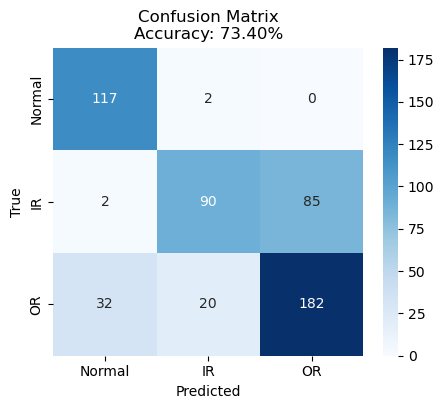

 - Model accuracy: 73.40%


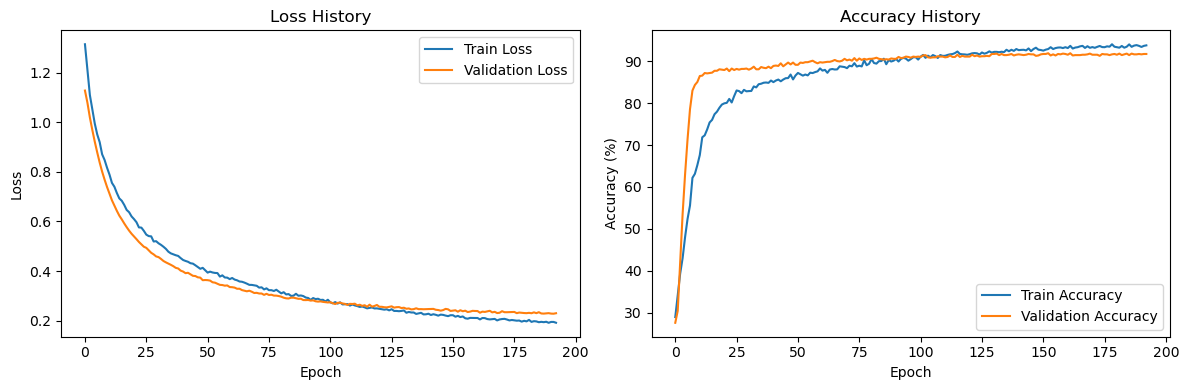

Early stopping at epoch 194


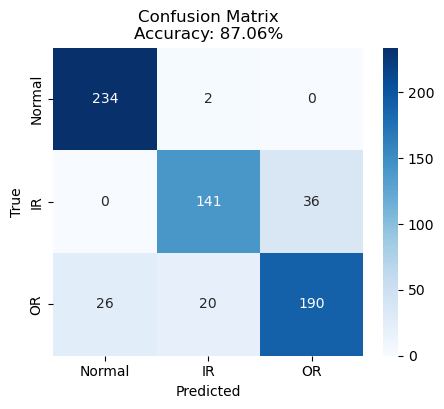

 - Model accuracy: 87.06%


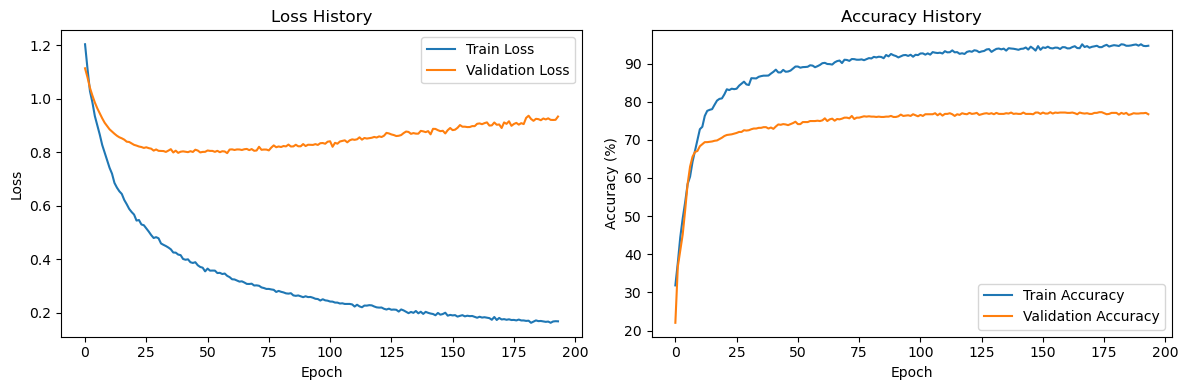

Early stopping at epoch 199


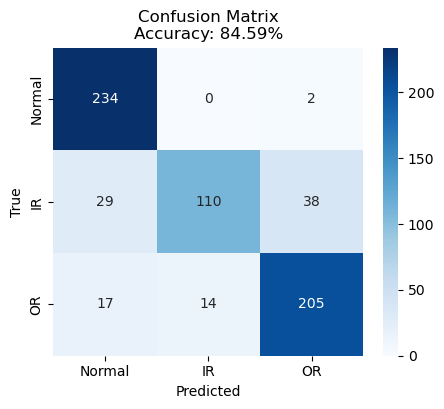

 - Model accuracy: 84.59%


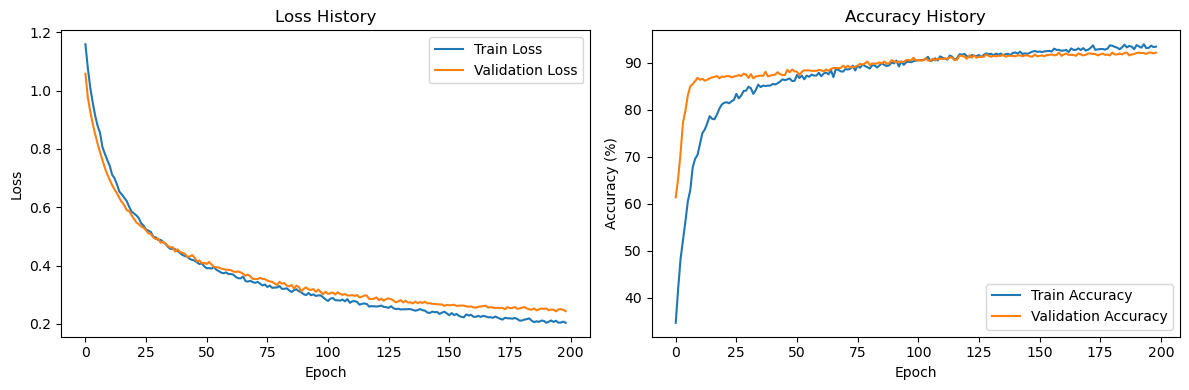

Early stopping at epoch 359


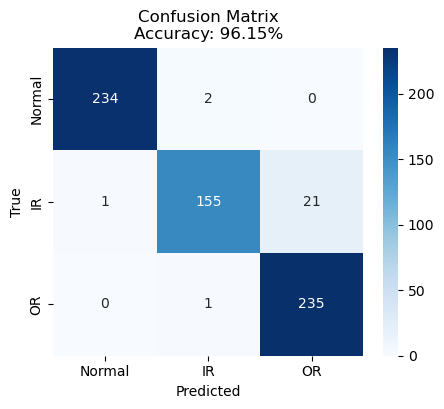

 - Model accuracy: 96.15%


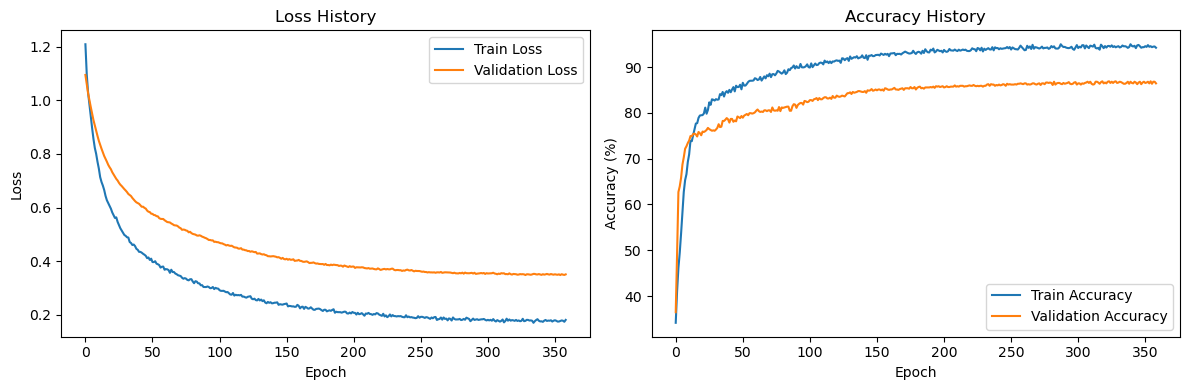

Early stopping at epoch 142


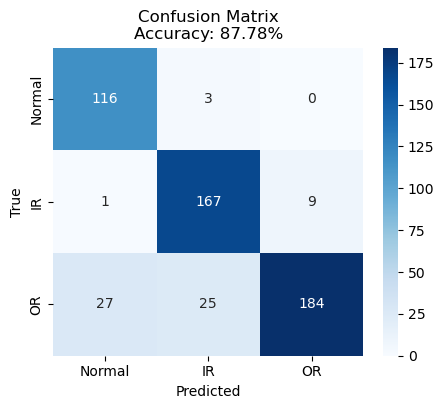

 - Model accuracy: 87.78%


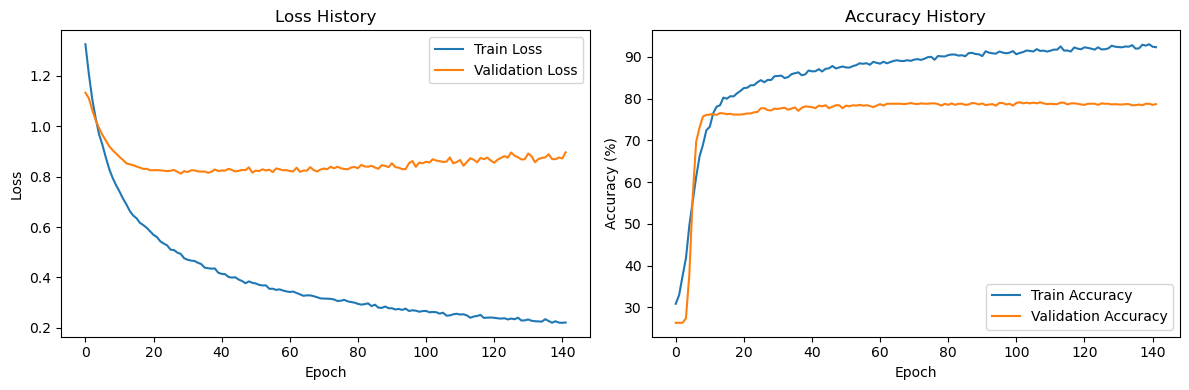

Early stopping at epoch 255


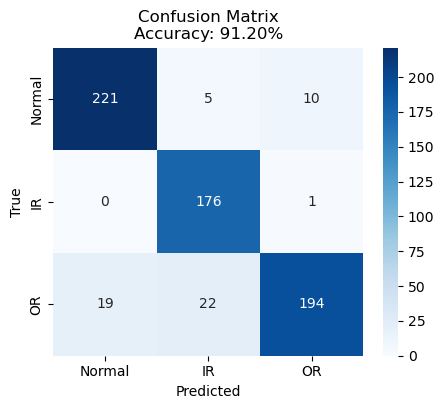

 - Model accuracy: 91.20%


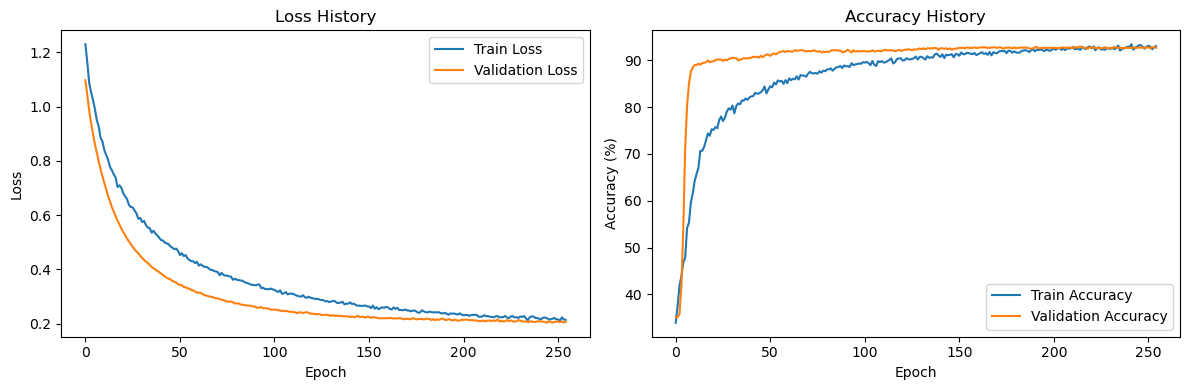

Early stopping at epoch 328


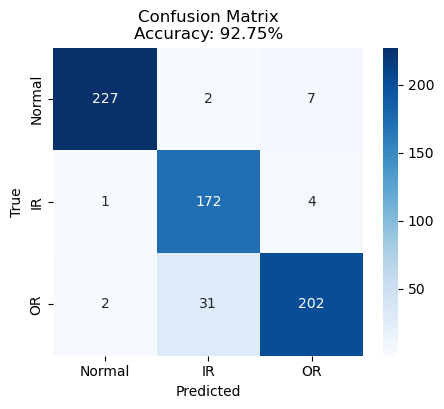

 - Model accuracy: 92.75%


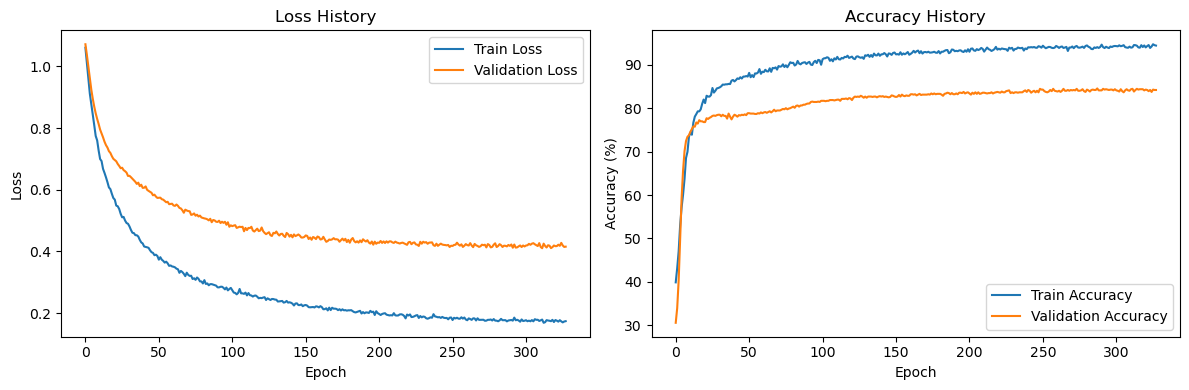

Early stopping at epoch 327


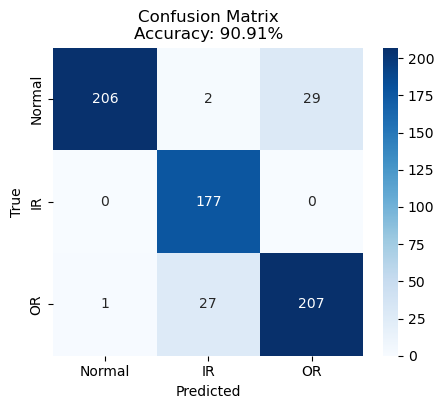

 - Model accuracy: 90.91%


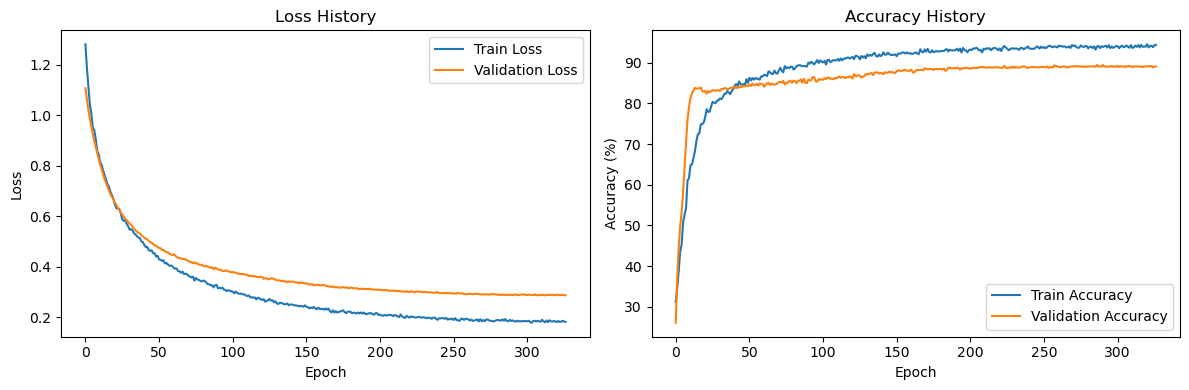

Early stopping at epoch 266


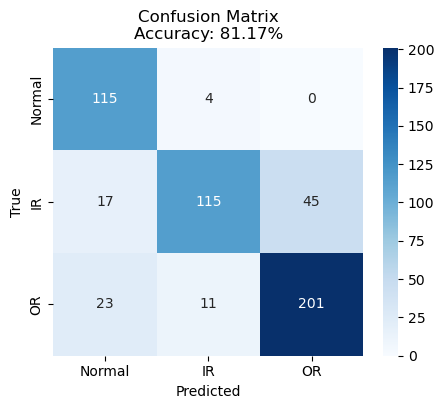

 - Model accuracy: 81.17%


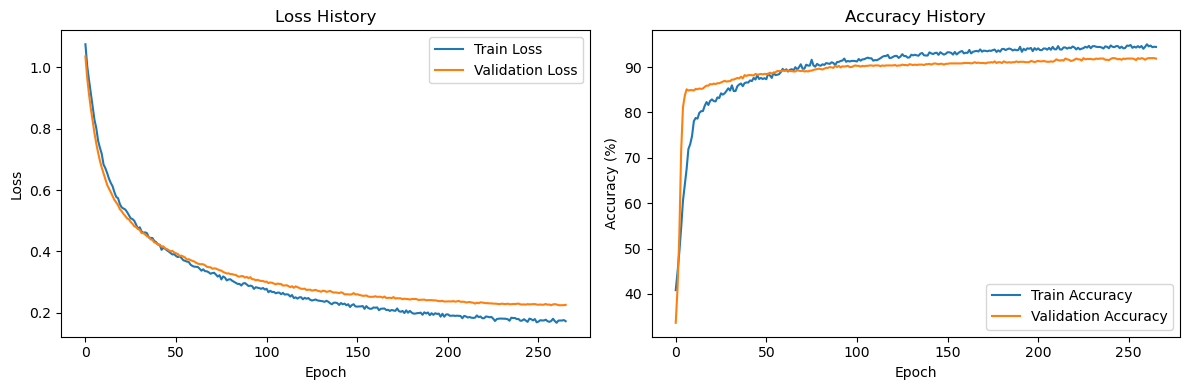

Early stopping at epoch 309


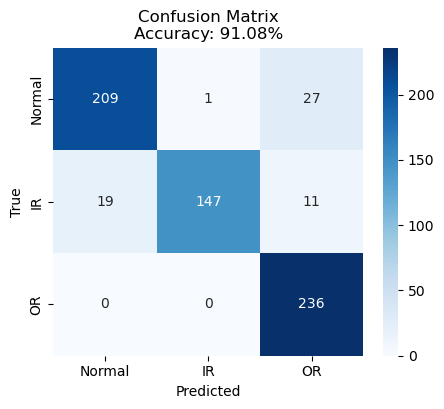

 - Model accuracy: 91.08%


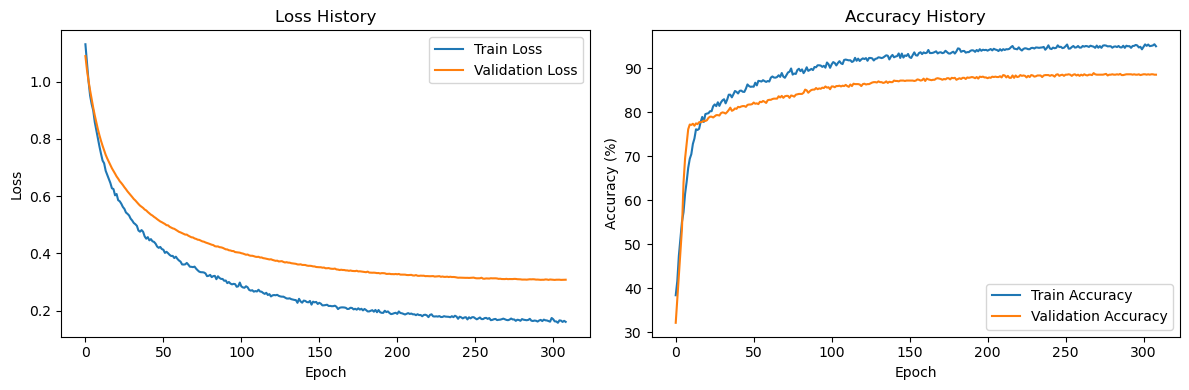

Early stopping at epoch 231


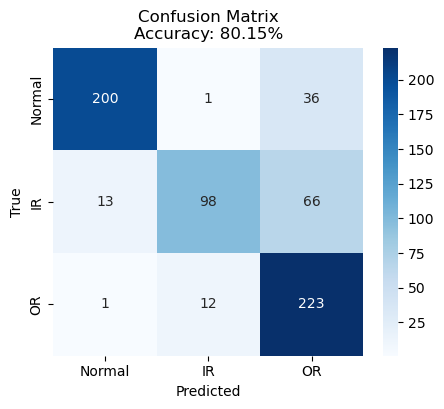

 - Model accuracy: 80.15%


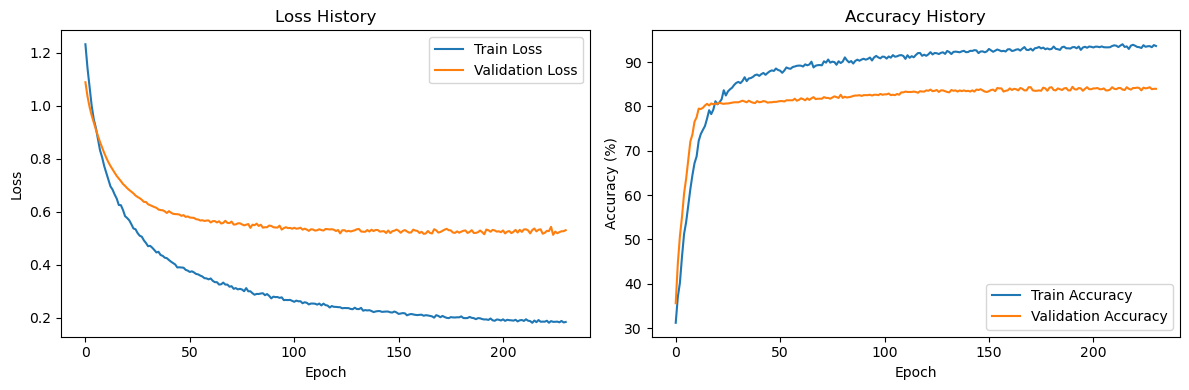

Early stopping at epoch 149


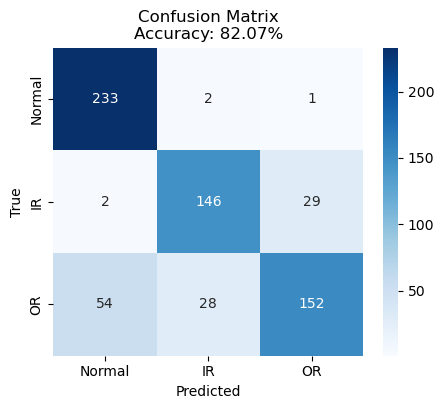

 - Model accuracy: 82.07%


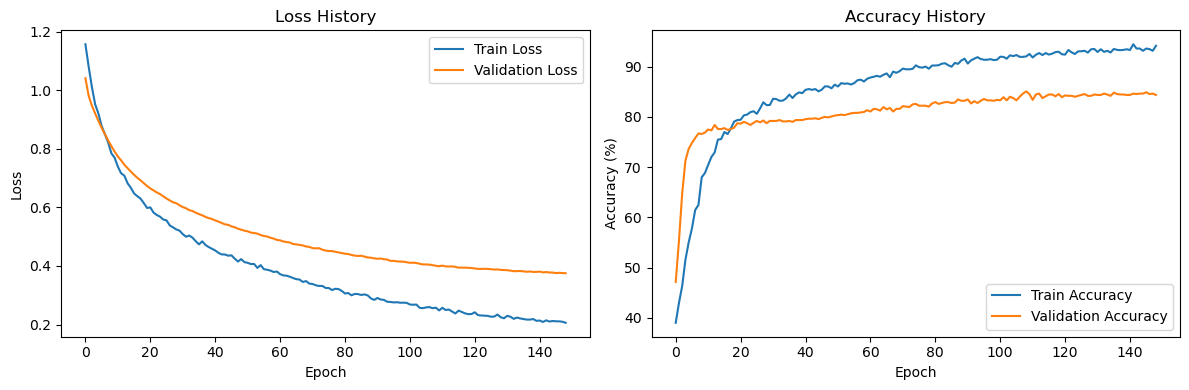

Early stopping at epoch 307


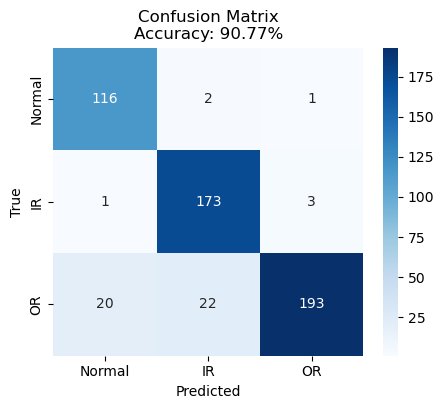

 - Model accuracy: 90.77%


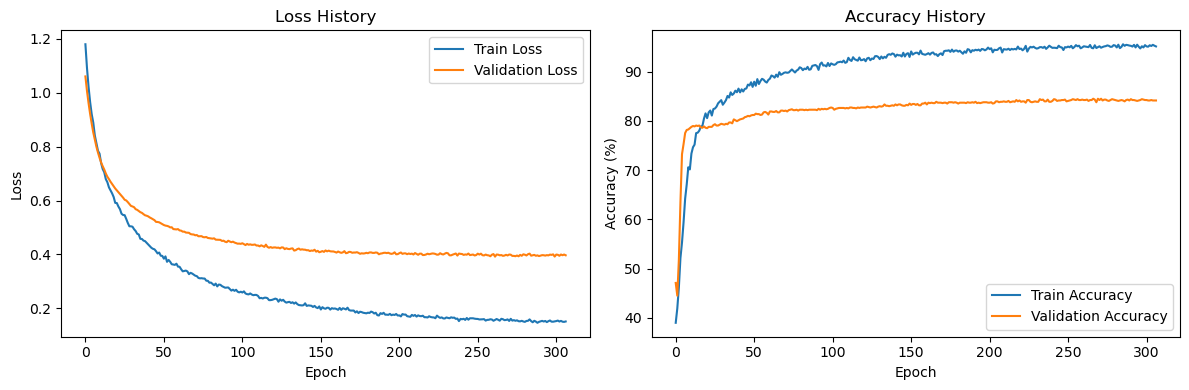

Early stopping at epoch 358


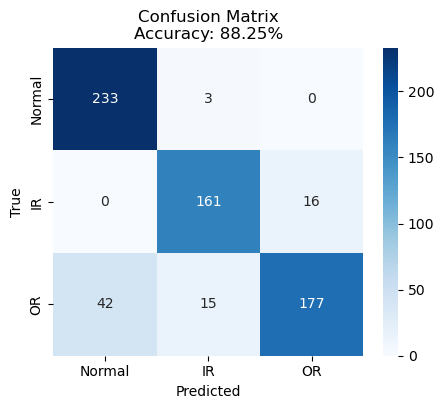

 - Model accuracy: 88.25%


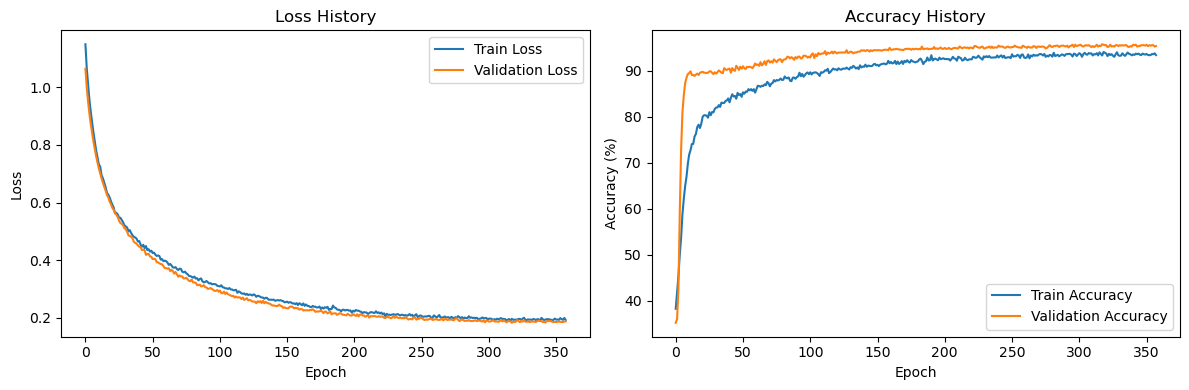

Early stopping at epoch 121


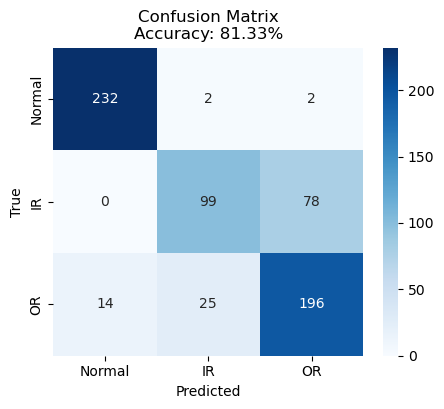

 - Model accuracy: 81.33%


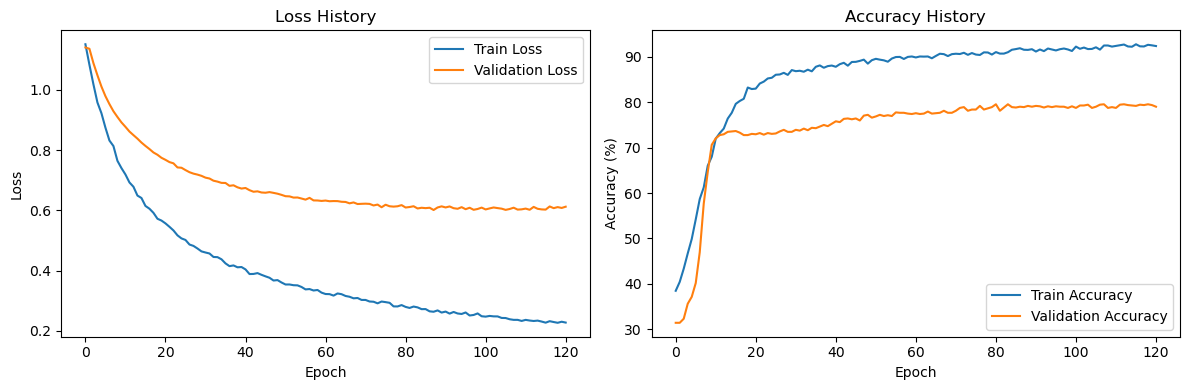

Early stopping at epoch 361


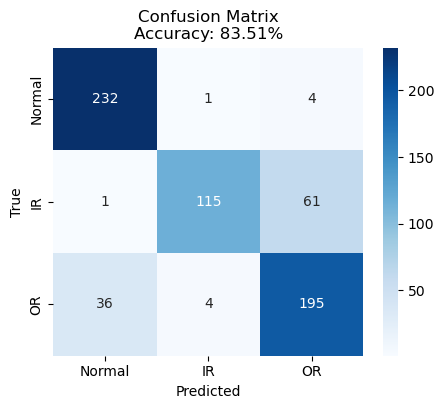

 - Model accuracy: 83.51%


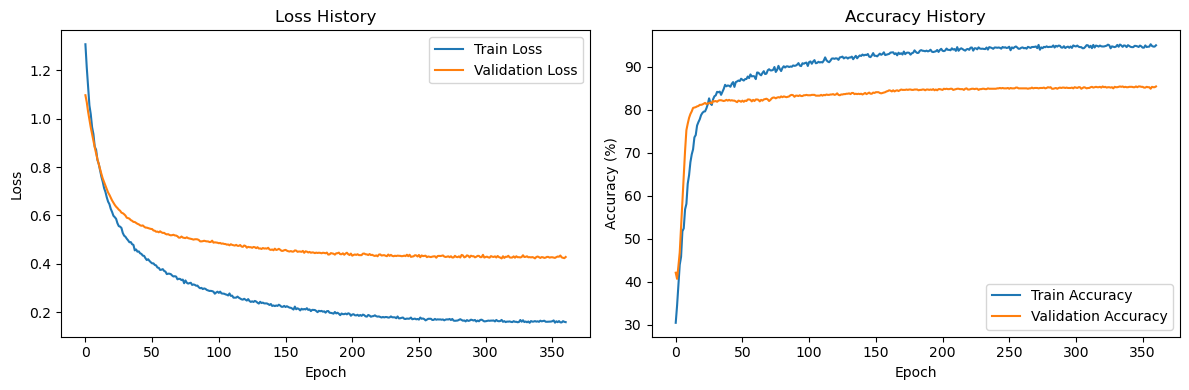

Early stopping at epoch 300


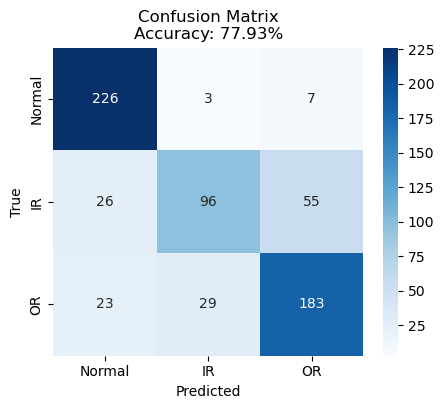

 - Model accuracy: 77.93%


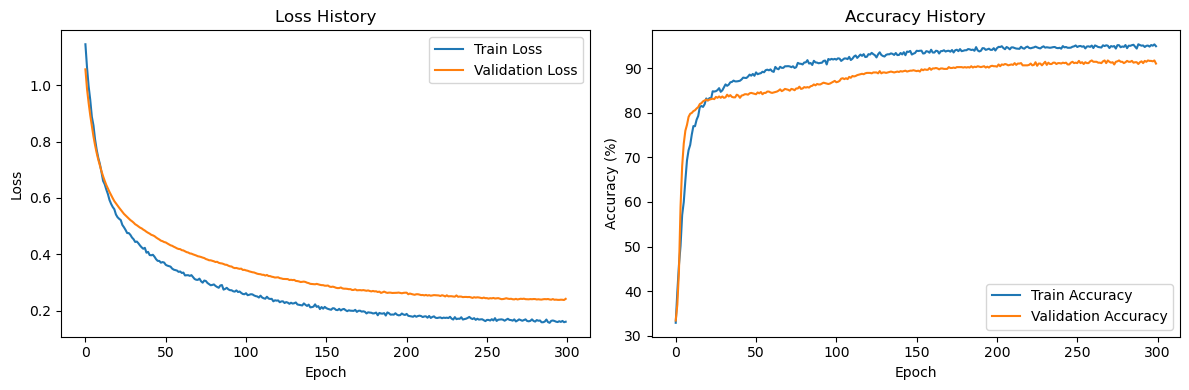

Early stopping at epoch 331


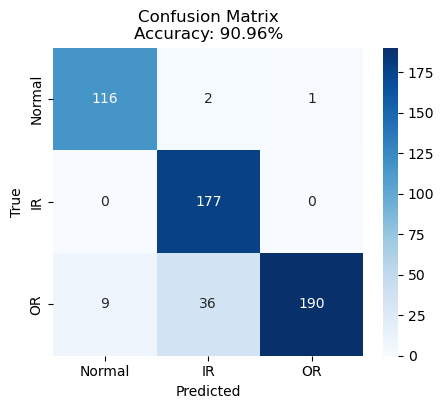

 - Model accuracy: 90.96%


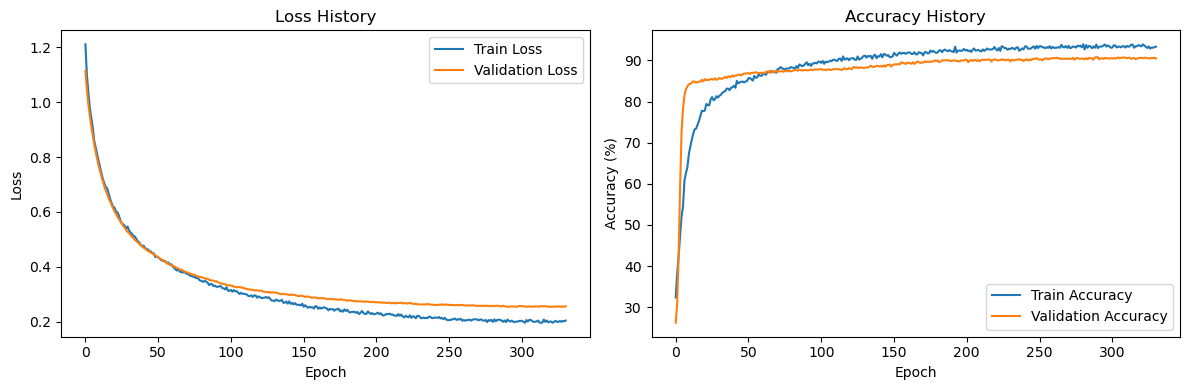

Early stopping at epoch 78


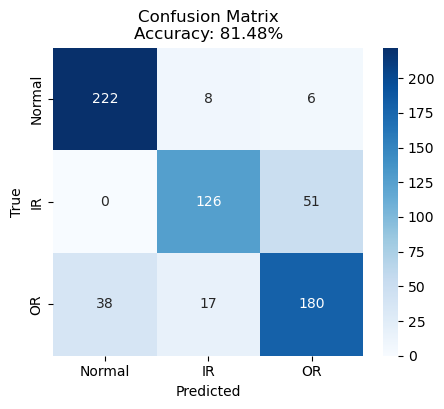

 - Model accuracy: 81.48%


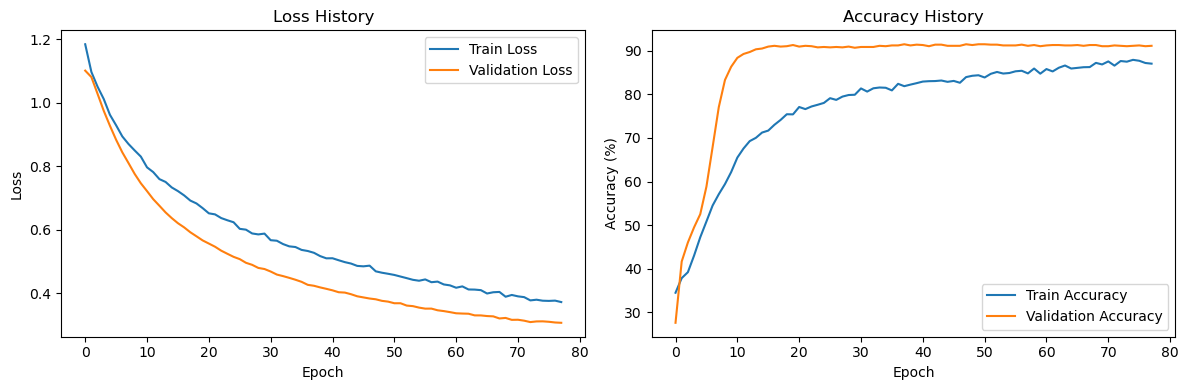

Early stopping at epoch 322


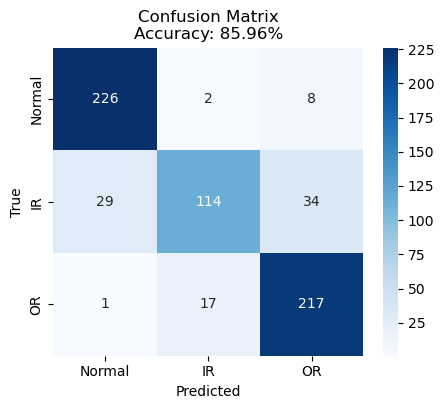

 - Model accuracy: 85.96%


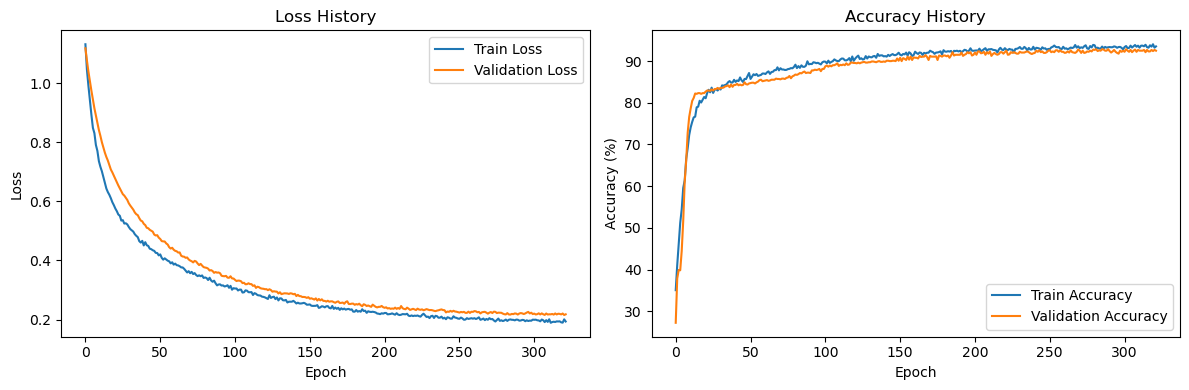

Early stopping at epoch 78


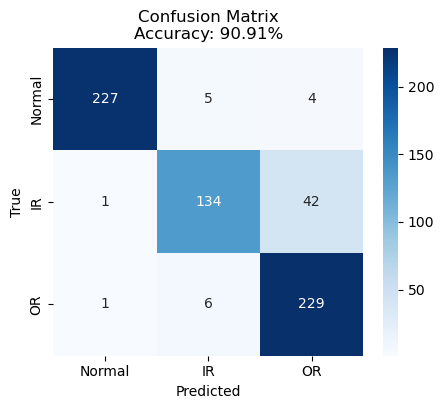

 - Model accuracy: 90.91%


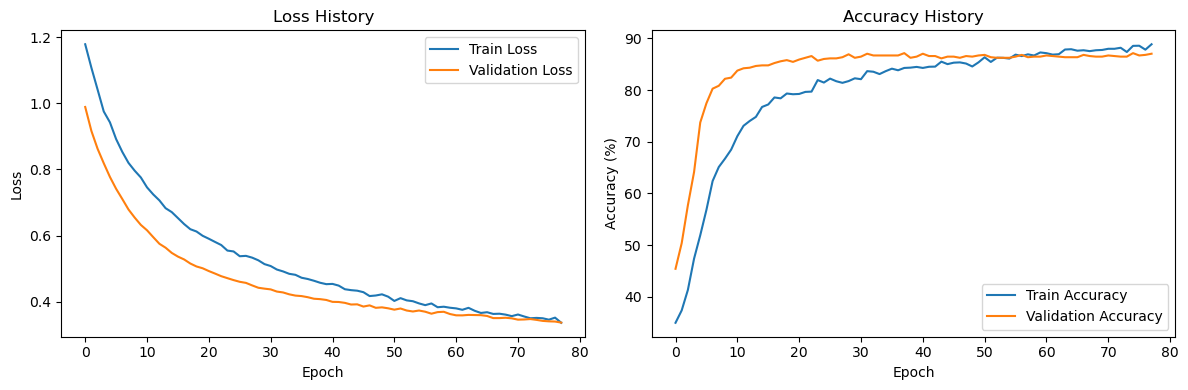

Early stopping at epoch 141


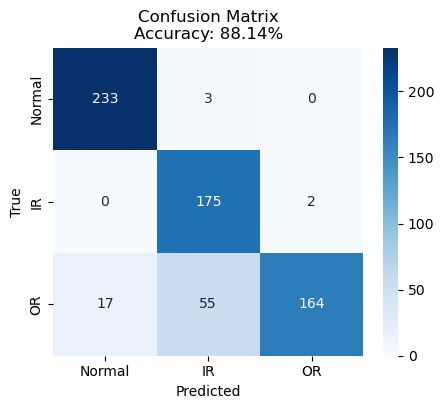

 - Model accuracy: 88.14%


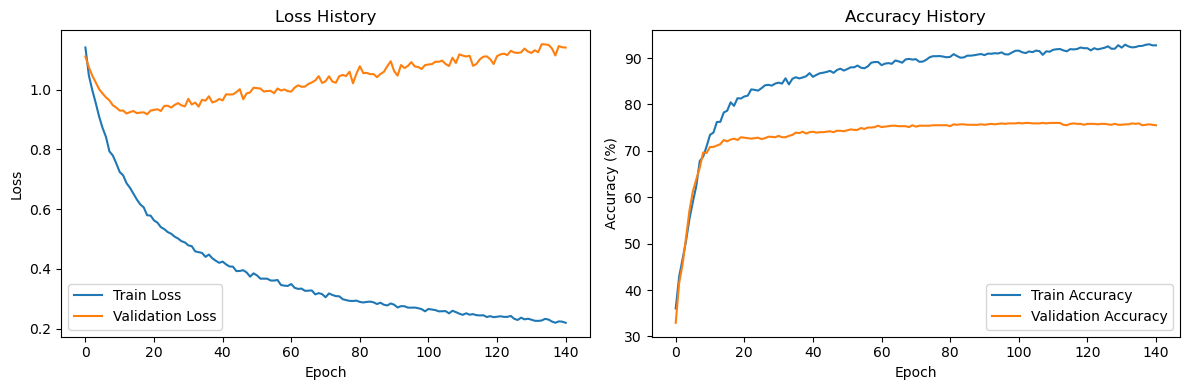

Early stopping at epoch 359


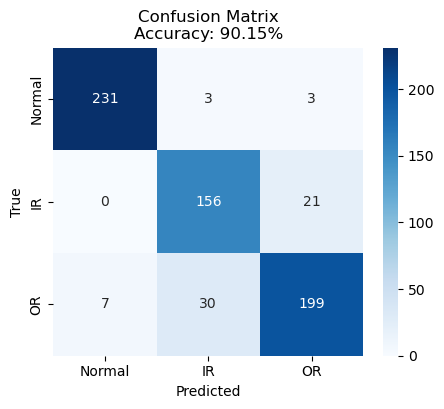

 - Model accuracy: 90.15%


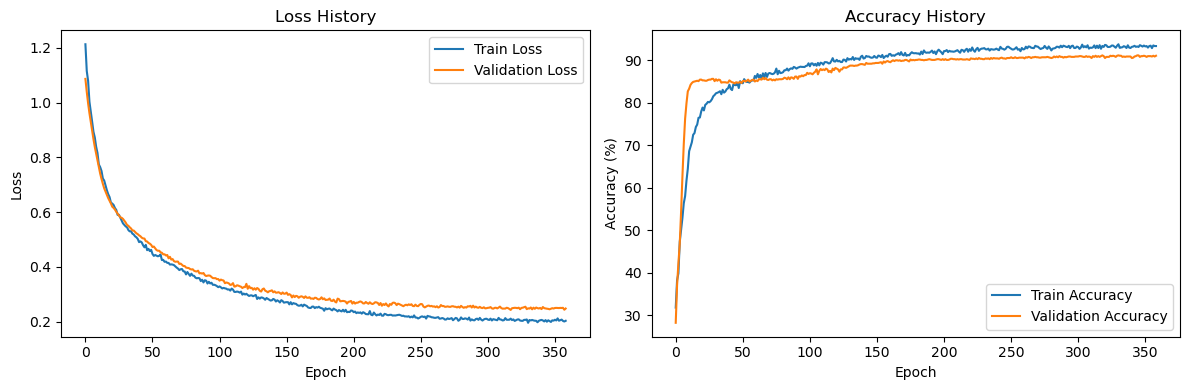

Early stopping at epoch 57


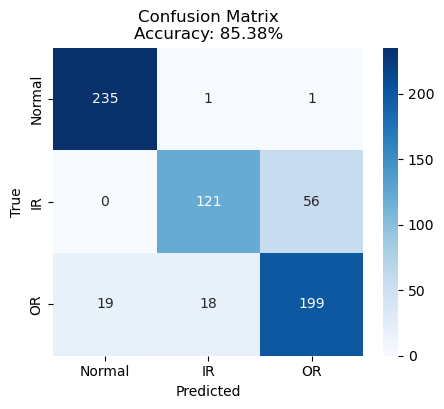

 - Model accuracy: 85.38%


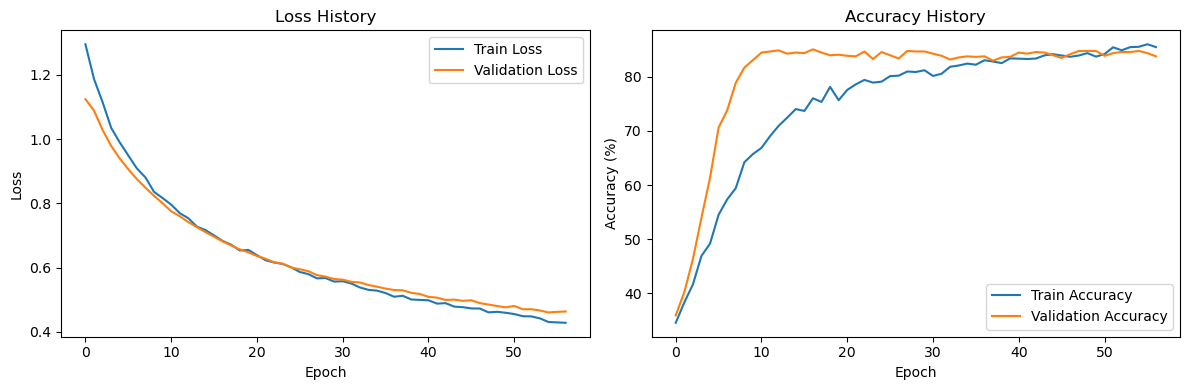

Early stopping at epoch 252


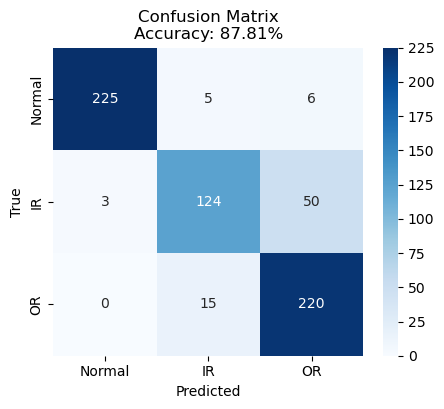

 - Model accuracy: 87.81%


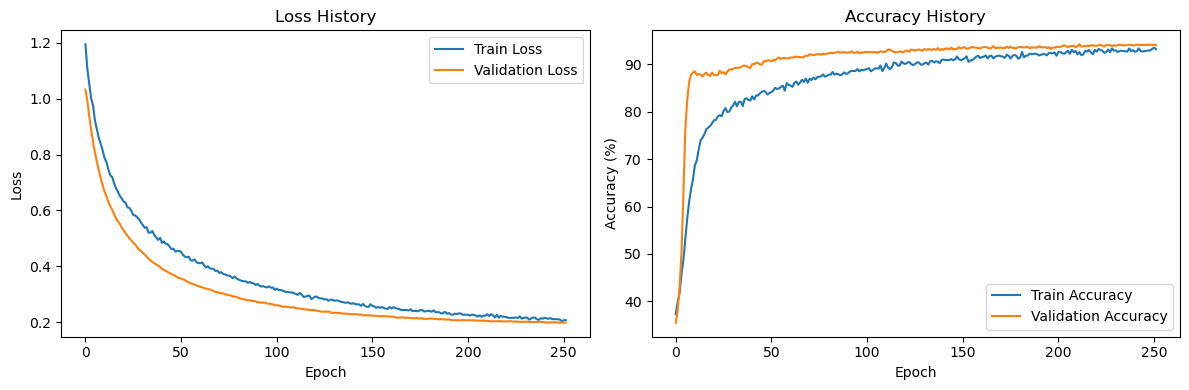

Early stopping at epoch 373


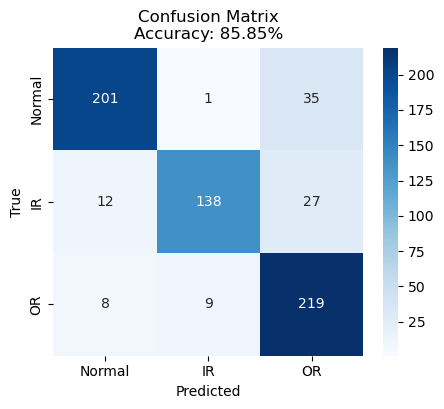

 - Model accuracy: 85.85%


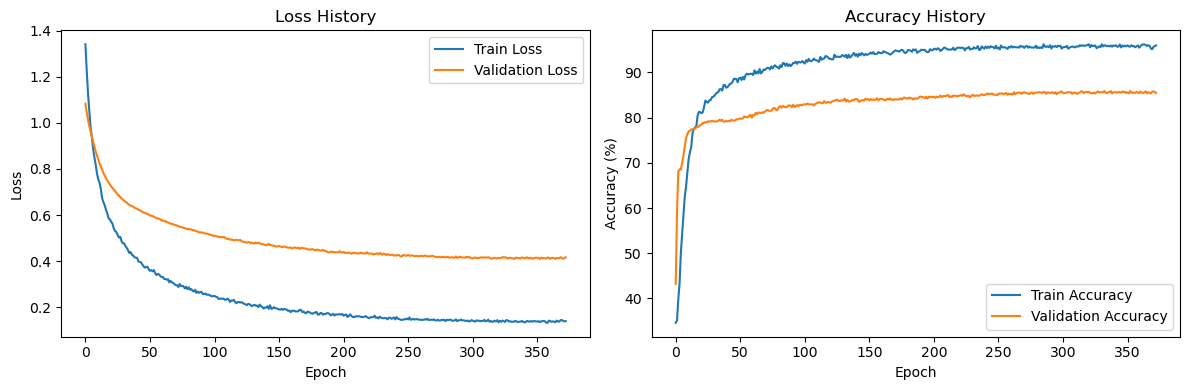

Early stopping at epoch 273


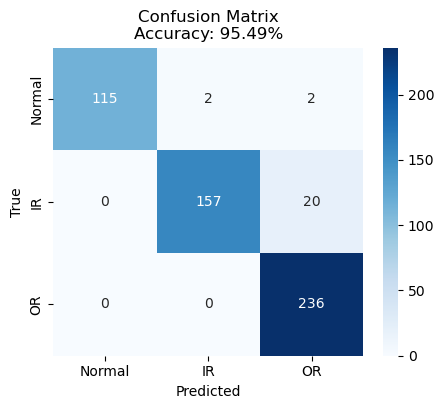

 - Model accuracy: 95.49%


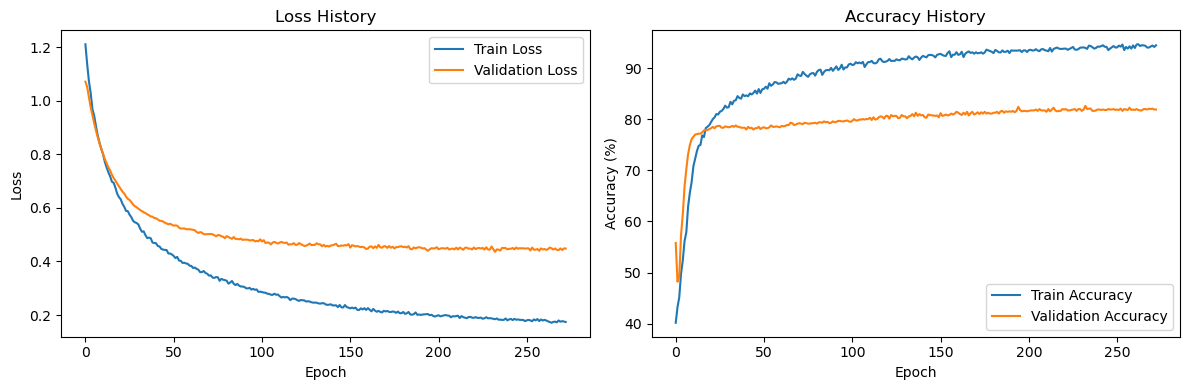

Early stopping at epoch 139


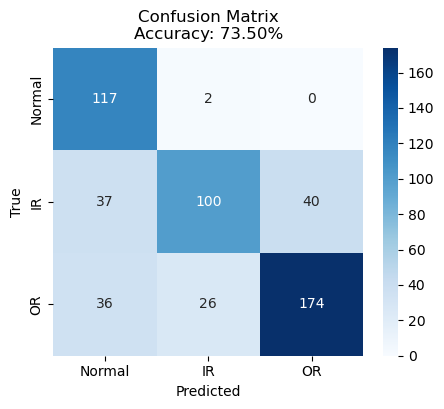

 - Model accuracy: 73.50%


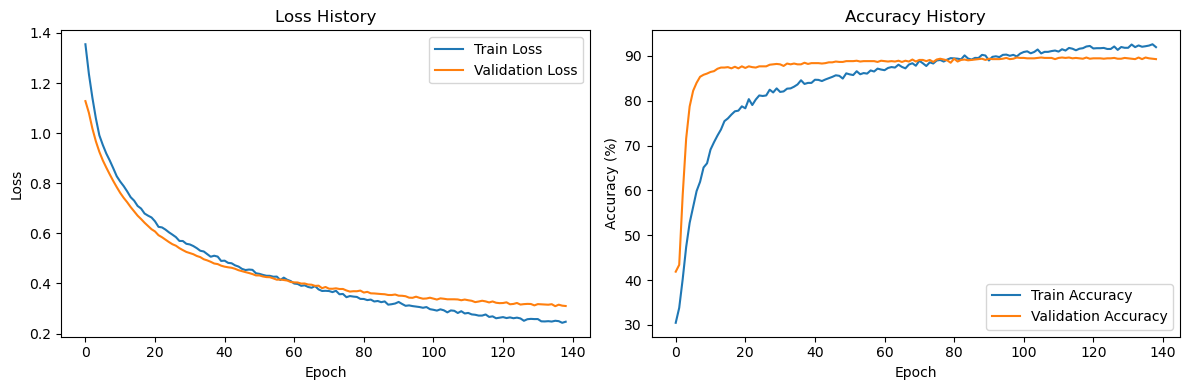

Mean accuracy: 0.8587080601152322
Std accuracy: 0.05808709217143748


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='rms')
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))